In [4]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import logging
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
logging.getLogger().setLevel(logging.INFO)

In [5]:
def get_data(n):
    u = np.array([0, 5, 10])
    us = np.random.randint(0,3,n)
    return np.random.normal(u[us], 1).reshape(n,1)

4.88871900097


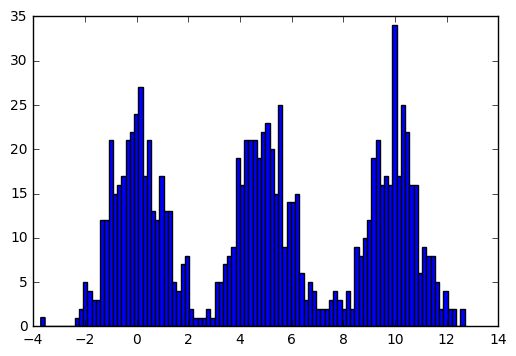

In [6]:
data = get_data(1000)
print(data.mean())
plt.hist(data, bins=100)
plt.show()

In [7]:
x = tf.placeholder(tf.float32, shape=[None, 1])
means = tf.Variable([6,3,4], dtype=tf.float32)
normals = tf.contrib.distributions.Normal(mu=means, sigma=1.0)
likelihoods = tf.reduce_mean(normals.pdf(x), reduction_indices=[1])
loglike = tf.reduce_sum(tf.log(likelihoods))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(-loglike)

In [8]:
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init)
for _ in range(10000):
    sess.run(train_step, feed_dict={x:data})
ans = means.eval(sess)
print(ans)
sess.close()

[ 9.95106125  0.01111502  4.9396286 ]


In [67]:
# 1 dimensional test
means = np.array([ [0, 1], [1, 2] ], dtype=np.float32) # 2 models with
stdevs = np.array([ [1, 1], [1, 1] ], dtype=np.float32)
mixing = tf.constant(np.array([ [0.5, 0.5], [0.5, 0.5] ], dtype=np.float32))
normals = tf.contrib.distributions.Normal(means, stdevs)
points = np.array([0, -1], dtype=np.float32)
ans = tf.reduce_sum(mixing * normals.pdf(points), reduction_indices=[0])
sess = tf.InteractiveSession()
sess.run(ans)

array([ 0.3204565,  0.0292114], dtype=float32)

In [104]:
means = tf.constant(np.array([[[0,0], [1,1]],[[2,2], [3,3]]], dtype=np.float32))
stdevs = tf.constant(np.array([[[1,1], [1,1]],[[1,1], [1,1]]], dtype=np.float32))
mixing = tf.constant(np.array([[0.5, 0.5], [0.5, 0.5]], dtype=np.float32))
normals = tf.contrib.distributions.MultivariateNormalDiag(means, stdevs)
x = tf.constant(np.array([[1,1], [3,3]], dtype=np.float32))

normal0 = tf.contrib.distributions.MultivariateNormalDiag(means[0], stdevs[0])
normal1 = tf.contrib.distributions.MultivariateNormalDiag(means[1], stdevs[1])

like0 = normal0.pdf(x[0]) * mixing[0]
like1 = normal1.pdf(x[1]) * mixing[1]

sess = tf.InteractiveSession()
sess.run(like0)

array([ 0.02927492,  0.07957748], dtype=float32)

In [93]:
normals.mu

<tf.Tensor 'MultivariateNormalDiag_27/init/mu:0' shape=(2, 2, 2) dtype=float32>

In [76]:
categorical = tf.contrib.distributions.MultivariateNormalDiag?

In [ ]:
categorical = tf.contrib.distributions.MultivariateNormalDiag

In [ ]:
categorical = tf.contrib.distributions.MultivariateNormalCholesky

In [ ]:
categorical = tf.contrib.distributions.Mixture

In [ ]:
categorical = tf.contrib.distributions.Categorical